In [1]:
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Konfigurasi database tujuan
dest_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
dest_app = firebase_admin.initialize_app(dest_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Referensi ke data sumber
source_ref = db.reference('/auto_weather_stat/id-03/data')

# Mengambil data dari database sumber
source_data = source_ref.get()

# Mengubah data menjadi DataFrame pandas
if source_data:
    # Mengubah data menjadi DataFrame
    df = pd.DataFrame.from_dict(source_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in df.columns:
        df.index.name = 'timestamp'  # Mengatur nama indeks
        df.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print(df.tail())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data di jalur /auto_weather_stat/id-03/data.")

                 dew humidity pressure temperature   timestamp  volt
1735998046    25.318    98.28  1011.49       25.61  1735998046  4.07
1735998106  25.30289    98.25   1011.5        25.6  1735998106  4.07
1735998166  25.28122    98.24  1011.53       25.58  1735998166  4.08
1735998226  25.30118    98.24   1011.5        25.6  1735998226  4.07
1735998286  25.29462    98.26  1011.52       25.59  1735998286  4.07


In [4]:
df.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1735997746,25.34793,98.28,1011.46,25.64,1735997746,4.07
1735997806,25.36133,98.3,1011.45,25.65,1735997806,4.08
1735997866,25.33796,98.28,1011.44,25.63,1735997866,4.07
1735997926,25.34138,98.3,1011.48,25.63,1735997926,4.07
1735997986,25.35136,98.3,1011.5,25.64,1735997986,4.07
1735998046,25.318,98.28,1011.49,25.61,1735998046,4.07
1735998106,25.30289,98.25,1011.5,25.6,1735998106,4.07
1735998166,25.28122,98.24,1011.53,25.58,1735998166,4.08
1735998226,25.30118,98.24,1011.5,25.6,1735998226,4.07
1735998286,25.29462,98.26,1011.52,25.59,1735998286,4.07


In [11]:
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce').astype('Int64')
df['dew'] = pd.to_numeric(df['dew'], errors='coerce').astype('float64')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce').astype('float64')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce').astype('float64')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce').astype('float64')
df['volt'] = pd.to_numeric(df['volt'], errors='coerce').astype('float64')


In [17]:
df = df[(df['temperature'] >= 10) & 
                      (df['humidity'] >= 0) & 
                      (df['pressure'] >= 1000) & 
                      (df['dew'] >= 10) &
                      (df['volt'] >= 0)]

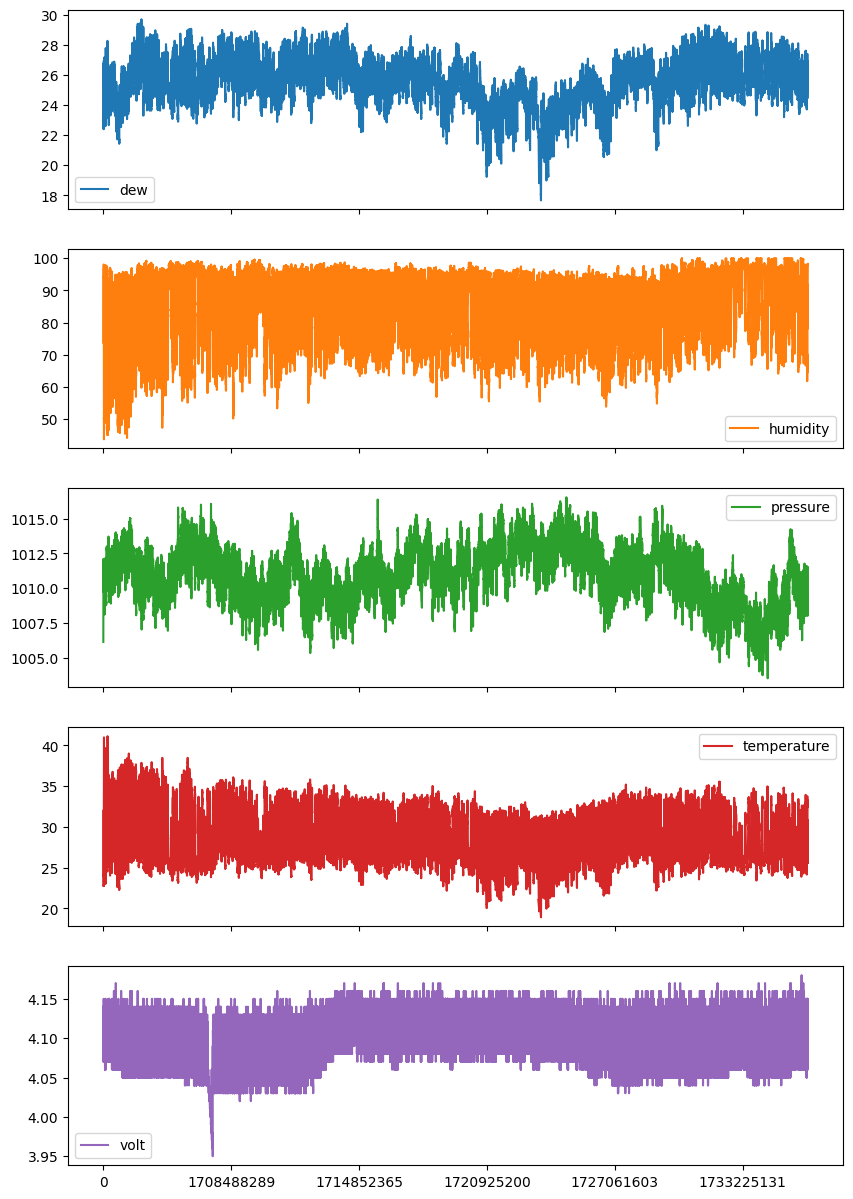

In [19]:
# Plot line chart
df.plot(y=['dew', 'humidity', 'pressure', 'temperature', 'volt'], subplots=True, figsize=(10, 15))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>